In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

In [31]:
customer_data = pd.read_csv('../data/customer_data.csv')
invoice_data = pd.read_csv('../data/invoice_data.csv')

In [32]:
#joining customer and invoice data
customer_invoice_right = customer_data.merge(invoice_data, on='Customer No.', how='right', sort=False)

In [12]:
customer_invoice_right.columns

Index(['Business Partner', 'Customer No.', 'Partner Type', 'Data Origin',
       'Title', 'Marital Status', 'Occupation', 'Date of Birth', 'Death date',
       'Area / Locality', 'CITY', 'Cash /Cashless Type', 'Claim No.',
       'Cust Type', 'District', 'Expiry Date', 'Gate Pass Date',
       'Gate Pass Time', 'Insurance Company', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model', 'ODN No.',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Service Advisor Name', 'Technician Name', 'Total Amt Wtd Tax.',
       'Total Value', 'User ID', 'Invoice Day', 'Invoice Month',
       'Invoice Year', 'Day of the week'],
      dtype='object')

In [18]:
invoice_data['Pin code'].isnull().sum()

0

In [21]:
pincode = pd.read_csv('../data/pincode.csv')

In [22]:
pincode.head()

,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
0,Achalapur B.O,504273,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Rechini S.O,Mancherial H.O,NaN,NaN
1,Ada B.O,504293,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Asifabad S.O,Mancherial H.O,NaN,NaN
2,Adegaon B.O,504307,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Boath,Adilabad,TELANGANA,NaN,Echoda S.O,Adilabad H.O,NaN,NaN
3,Adilabad Collectorate S.O,504001,S.O,Non-Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226703,NaN,Adilabad H.O,NaN,NaN
4,Adilabad H.O,504001,H.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226738,NaN,NaN,NaN,NaN


In [23]:
pincode_req = pincode[['pincode','divisionname','Districtname','statename']]

In [38]:
invoice_data_pincode_cleaned = invoice_data.merge(pincode_req.drop_duplicates(subset=['pincode']), left_on='Pin code', right_on = 'pincode',how='left', sort=False)

In [41]:
invoice_data_pincode_cleaned['statename'].fillna(invoice_data_pincode_cleaned['District'], inplace=True)
invoice_data_pincode_cleaned['Districtname'].fillna(invoice_data_pincode_cleaned['CITY'], inplace=True)
invoice_data_pincode_cleaned['divisionname'].fillna(invoice_data_pincode_cleaned['Area / Locality'], inplace=True)

In [45]:
invoice_data_pincode_cleaned.drop(['Area / Locality','CITY','pincode','District'],1,inplace=True)

In [71]:
invoice_data_pincode_cleaned.head()

,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,Expiry Date,Gate Pass Date,Gate Pass Time,Insurance Company,Invoice Date,Invoice No,...,Total Amt Wtd Tax.,Total Value,User ID,Invoice Day,Invoice Month,Invoice Year,Day of the week,Division Name,District,State
0,NaN,NaN,Retail,67849,NaN,NaN,00:00:00,NaN,2015-01-02,7005200002,...,4051.95,4051.95,BC01FS1,2,1,2015,Friday,Thane Central,thane,maharashtra
1,NaN,NaN,Retail,84419,NaN,NaN,00:00:00,NaN,2015-01-03,7005200003,...,1001.29,1001.29,BC01SA2,3,1,2015,Saturday,Thane Central,thane,maharashtra
2,NaN,NaN,Retail,81055,NaN,NaN,00:00:00,NaN,2015-01-03,7005200004,...,233.14,233.14,BC01SA2,3,1,2015,Saturday,Thane Central,thane,maharashtra
3,NaN,NaN,Retail,84419,NaN,NaN,00:00:00,NaN,2015-01-03,7005200005,...,0.00,0.00,BC01SA2,3,1,2015,Saturday,Thane Central,thane,maharashtra
4,NaN,NaN,Retail,18980,NaN,NaN,00:00:00,NaN,2015-01-03,7005200006,...,2747.12,2747.12,BC01SA2,3,1,2015,Saturday,Thane Central,thane,maharashtra


In [99]:
invoice_data_pincode_cleaned.to_csv('../data/invoice_data_cleaned.csv',index=False)

In [33]:
invoice_data_pincode_cleaned = pd.read_csv('../data/invoice_data_cleaned.csv')

In [70]:
invoice_data_pincode_cleaned['District'] = invoice_data_pincode_cleaned['District'].str.lower()

invoice_data_pincode_cleaned['State'] = invoice_data_pincode_cleaned['State'].str.lower()

In [81]:
plt.rcParams.update({'font.size': 15})

Text(0, 0.5, 'State')

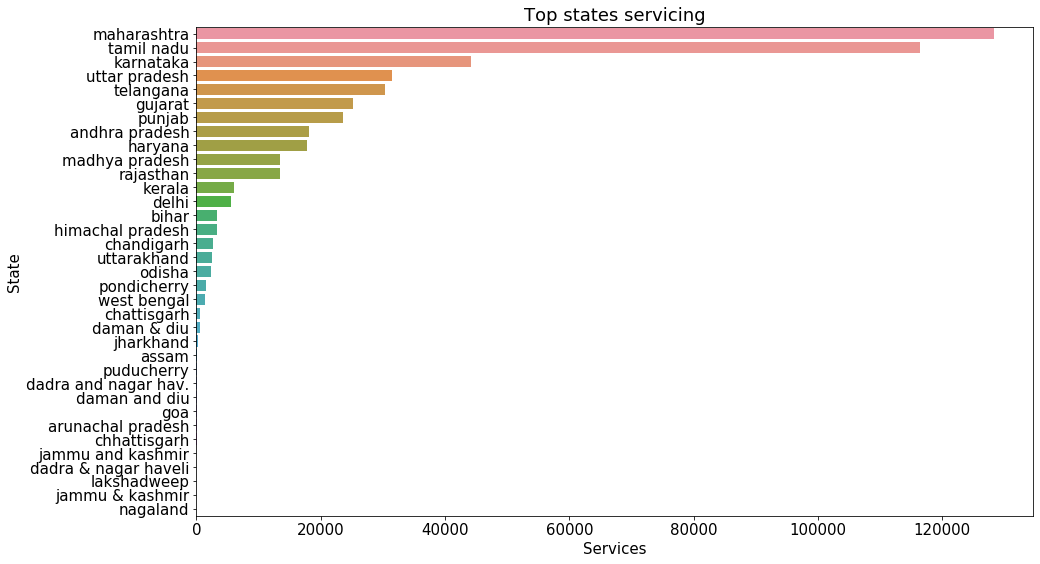

In [82]:
top_state_services = invoice_data_pincode_cleaned['State'].value_counts().reset_index()

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Top states servicing')
ax = sns.barplot(x='State', y='index', data=top_state_services)
ax.set_xlabel('Services')
ax.set_ylabel('State')

Text(0, 0.5, 'City')

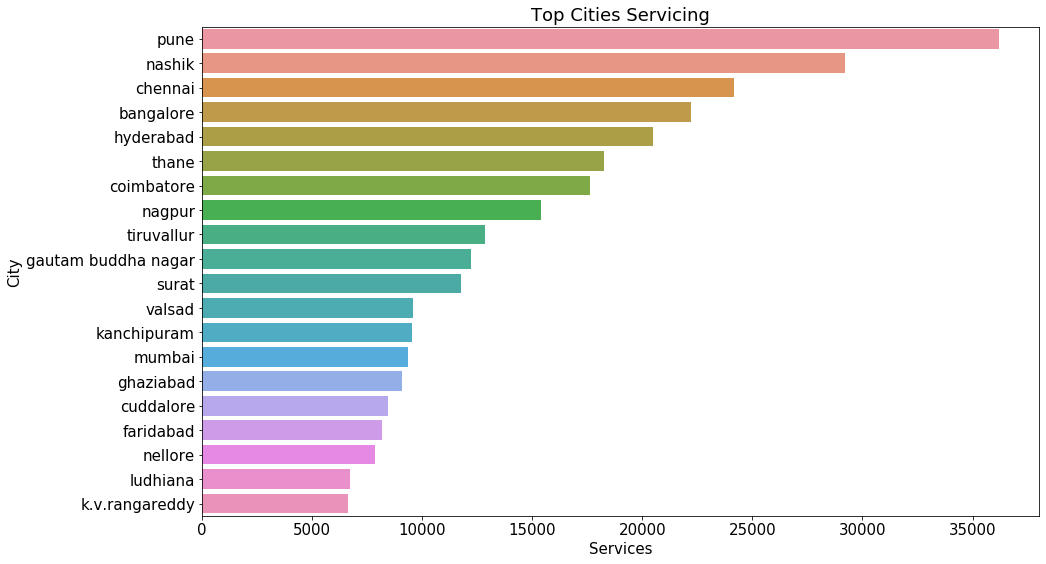

In [89]:
top_city_services = invoice_data_pincode_cleaned['District'].value_counts().reset_index()[:20]

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Top Cities Servicing')
ax = sns.barplot(x='District', y='index', data=top_city_services)
ax.set_xlabel('Services')
ax.set_ylabel('City')

Text(0, 0.5, 'State')

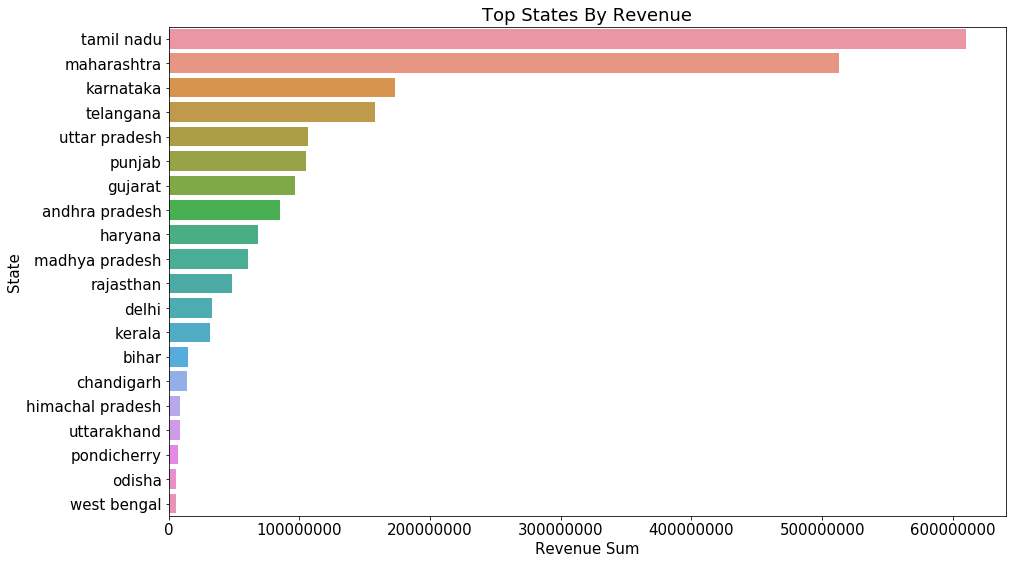

In [97]:
top_states_revenue = invoice_data_pincode_cleaned.groupby('State')['Total Amt Wtd Tax.'].sum().reset_index().sort_values('Total Amt Wtd Tax.', ascending=False)[:20]

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Top States By Revenue')
ax = sns.barplot(x='Total Amt Wtd Tax.', y='State', data=top_states_revenue)
ax.set_xlabel('Revenue Sum')
ax.set_ylabel('State')

Text(0, 0.5, 'City')

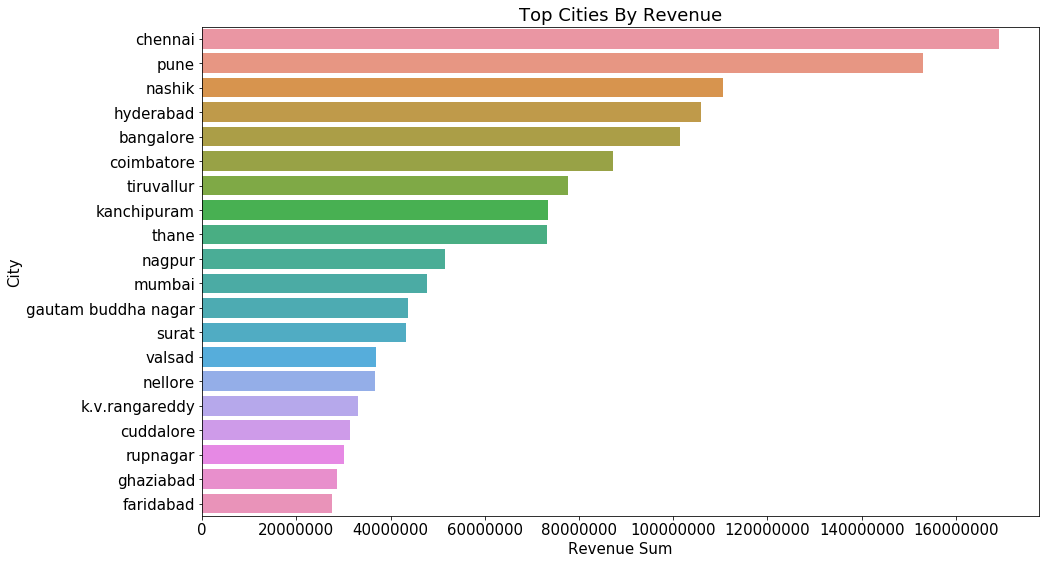

In [98]:
top_states_revenue = invoice_data_pincode_cleaned.groupby('District')['Total Amt Wtd Tax.'].sum().reset_index().sort_values('Total Amt Wtd Tax.', ascending=False)[:20]

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Top Cities By Revenue')
ax = sns.barplot(x='Total Amt Wtd Tax.', y='District', data=top_states_revenue)
ax.set_xlabel('Revenue Sum')
ax.set_ylabel('City')

In [34]:
#joining customer and invoice data
customer_invoice_right = customer_data.merge(invoice_data_pincode_cleaned, on='Customer No.', how='right', sort=False)

In [120]:
tx_user = pd.DataFrame(customer_invoice_right['Customer No.'].unique())
tx_user.columns = ['CustomerID']

In [104]:
#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = customer_invoice_right.groupby('Customer No.')['Invoice Date'].max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
tx_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,1,2013-03-30
1,10,2013-06-17
2,100,2012-09-12
3,1000,2014-10-14
4,10000,2015-08-22


In [112]:
tx_max_purchase['MaxPurchaseDate'] = pd.to_datetime(tx_max_purchase['MaxPurchaseDate'], errors='coerce')

In [117]:
#we take our observation point as the max invoice date in our dataset
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,1,2013-03-30,1311
1,10,2013-06-17,1232
2,100,2012-09-12,1510
3,1000,2014-10-14,748
4,10000,2015-08-22,436


In [121]:
#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')
tx_user.head()

,CustomerID,Recency
0,CS000018,186
1,E10007,1215
2,E10013,1052
3,E10014,1290
4,E10023,343


Text(0, 0.5, 'Number of customers')

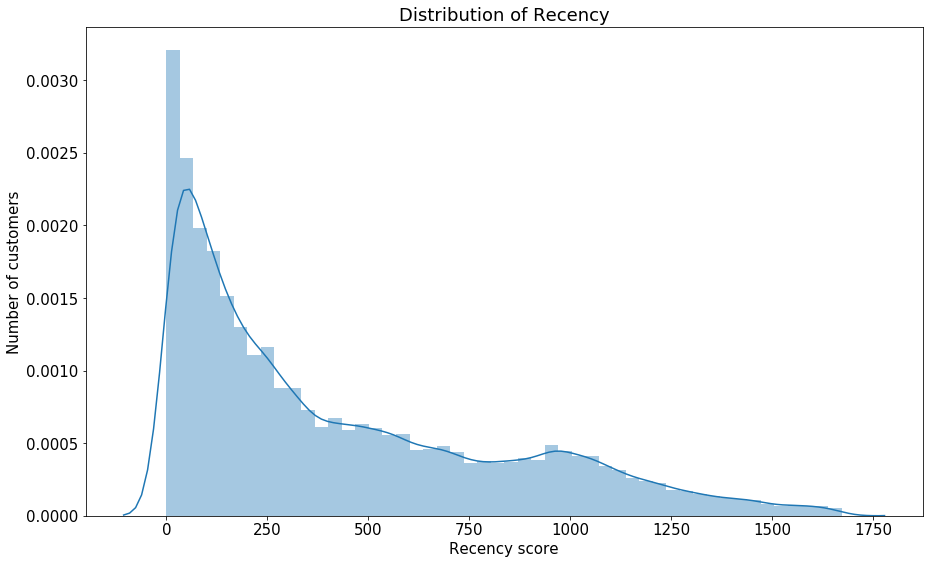

In [132]:
plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
ax = sns.distplot(tx_user['Recency'].values)
plt.title('Distribution of Recency')
ax.set_xlabel('Recency score')
ax.set_ylabel('Number of customers')

In [133]:
tx_user['Recency'].describe()

count    253484.000000
mean        427.899035
std         401.075875
min           0.000000
25%          97.000000
50%         281.000000
75%         684.000000
max        1673.000000
Name: Recency, dtype: float64

In [134]:
from sklearn.cluster import KMeans

sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    print("Running iteration"+str(k))
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    print("Inertia: "+str(kmeans.inertia_))


Running iteration1
Inertia: 40775746277.00397
Running iteration2
Inertia: 9779261911.96669
Running iteration3
Inertia: 4513006704.219071
Running iteration4
Inertia: 2766160282.2893996
Running iteration5
Inertia: 1704328273.3262396
Running iteration6
Inertia: 1192333835.030471
Running iteration7
Inertia: 895888594.7715516
Running iteration8
Inertia: 685350778.2839875
Running iteration9
Inertia: 542281136.4033117


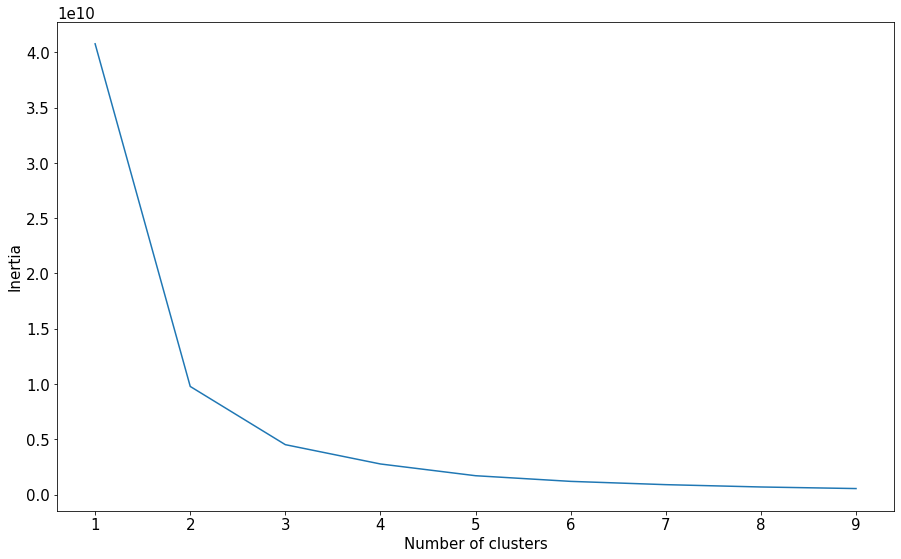

In [135]:
plt.figure(figsize=(15,9))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [195]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

In [196]:
tx_user['RecencyCluster'].value_counts()

0    142139
1     64097
2     47248
Name: RecencyCluster, dtype: int64

In [197]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [198]:
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

In [199]:
tx_user['RecencyCluster'].value_counts()

2    142139
1     64097
0     47248
Name: RecencyCluster, dtype: int64

In [200]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,47248.0,1118.906536,199.479773,847.0,961.0,1070.0,1238.0,1673.0
1,64097.0,572.509400,138.720763,354.0,455.0,557.0,685.0,846.0
2,142139.0,132.991846,99.226418,0.0,46.0,110.0,210.0,353.0


In [201]:
#get order counts for each user and create a dataframe with it
tx_frequency = customer_invoice_right.groupby('Customer No.')['Invoice Date'].count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']
tx_frequency.head()

,CustomerID,Frequency
0,1,4
1,10,5
2,100,2
3,1000,6
4,10000,7


In [210]:
#add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')

In [211]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency
0,CS000018,186,2,1
1,E10181,33,2,10
2,E10359,191,2,19
3,E10381,171,2,7
4,E10653,196,2,3


In [212]:
tx_user['Frequency'].describe()

count    253484.000000
mean          1.942190
std           6.182509
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2668.000000
Name: Frequency, dtype: float64

In [213]:
freq_plot = tx_user[tx_user['Frequency']>100]

Text(0, 0.5, 'Number of customers')

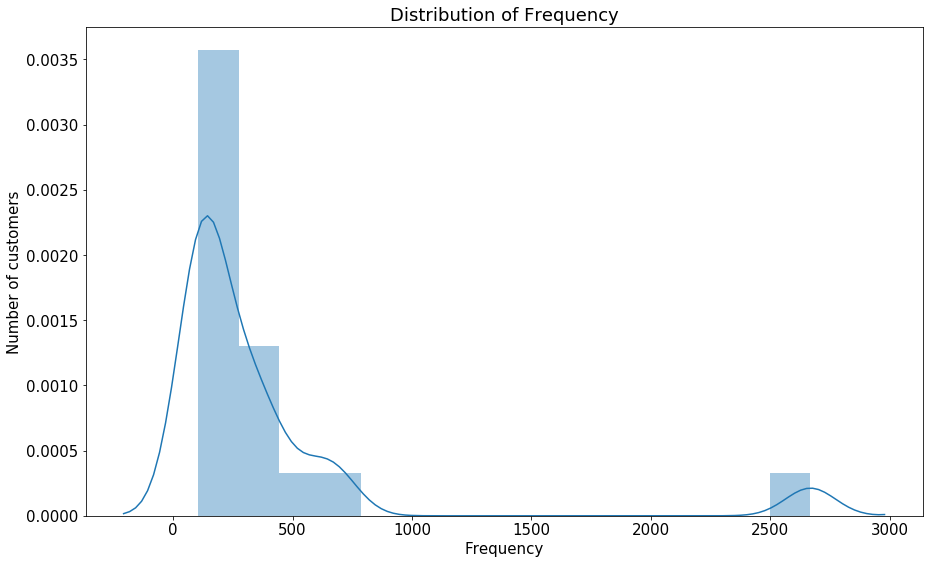

In [214]:
plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
ax = sns.distplot(freq_plot['Frequency'].values)
plt.title('Distribution of Frequency')
ax.set_xlabel('Frequency')
ax.set_ylabel('Number of customers')

In [215]:
#k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

In [216]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,CS000018,186,2,1,0
1,E10181,33,2,10,0
2,E10359,191,2,19,0
3,E10381,171,2,7,0
4,E10653,196,2,3,0


In [217]:
tx_user['FrequencyCluster'].value_counts()

0    253476
2         7
1         1
Name: FrequencyCluster, dtype: int64

In [218]:
#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

In [219]:
#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,253476.0,1.919862,2.124685,1.0,1.0,1.0,2.0,157.0
1,7.0,429.571429,161.590900,251.0,328.5,360.0,525.5,688.0
2,1.0,2668.000000,NaN,2668.0,2668.0,2668.0,2668.0,2668.0


In [226]:
#calculate revenue for each customer
tx_revenue = customer_invoice_right.groupby('Customer No.')['Total Amt Wtd Tax.'].sum().reset_index()
tx_revenue.columns = ['CustomerID','Revenue']
tx_revenue.head()

,CustomerID,Revenue
0,1,0.00
1,10,11105.56
2,100,20799.74
3,1000,8813.44
4,10000,1735.52


In [227]:
#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

In [228]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,CS000018,186,2,1,0,49.75
1,E10181,33,2,10,0,69731.05
2,E10359,191,2,19,0,68801.88
3,E10381,171,2,7,0,3891.28
4,E10653,196,2,3,0,41121.73


In [230]:
tx_user['Revenue'].describe()

count    2.534840e+05
mean     8.535893e+03
std      3.361613e+04
min     -1.000000e-02
25%      5.042550e+02
50%      2.574190e+03
75%      8.213783e+03
max      1.185973e+07
Name: Revenue, dtype: float64

In [237]:
revenue = tx_user[tx_user['Revenue']<50000]

Text(0, 0.5, 'Number of customers')

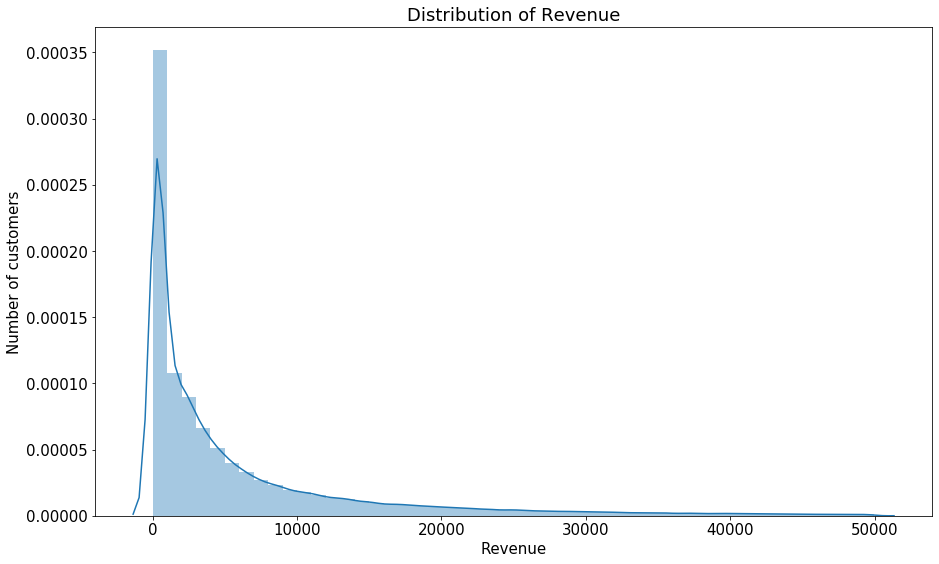

In [238]:
plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
ax = sns.distplot(revenue['Revenue'].values)
plt.title('Distribution of Revenue')
ax.set_xlabel('Revenue')
ax.set_ylabel('Number of customers')

In [239]:
#apply clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])


#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,248088.0,6.271970e+03,9517.418860,-0.01,4.881800e+02,2.459975e+03,7.552753e+03,58263.96
1,5395.0,1.104453e+05,110802.109099,58269.79,6.821601e+04,8.367034e+04,1.180055e+05,3801248.91
2,1.0,1.185973e+07,NaN,11859728.34,1.185973e+07,1.185973e+07,1.185973e+07,11859728.34


In [240]:
#calculate overall score and use mean() to see details
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,1119.182215,1.578335,5.495898e+03
1,577.225430,1.960168,7.855561e+03
2,137.692024,1.908573,7.248093e+03
3,132.762666,6.440591,1.118337e+05
4,78.000000,429.571429,1.617386e+06
6,48.000000,2668.000000,1.185973e+07


In [242]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>1,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>3,'Segment'] = 'High-Value' 

In [244]:
tx_user['Segment'].value_counts()

Mid-Value     143658
Low-Value     109818
High-Value         8
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Frequency and Recency clusters')

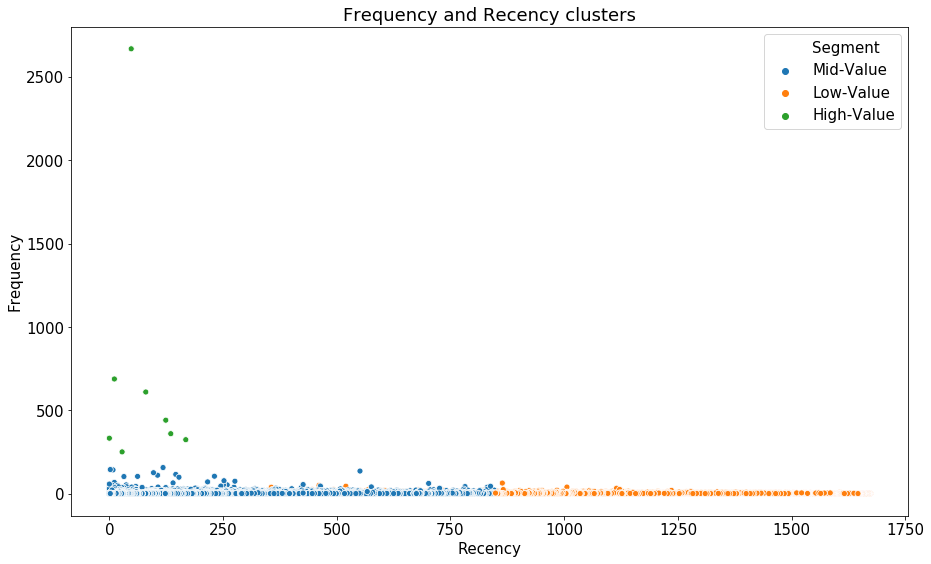

In [255]:
plt.figure(figsize=(15,9))
sns.scatterplot('Recency','Frequency',data=tx_user,hue='Segment')
plt.title('Frequency and Recency clusters')

Text(0.5, 1.0, 'Recency and Revenue clusters')

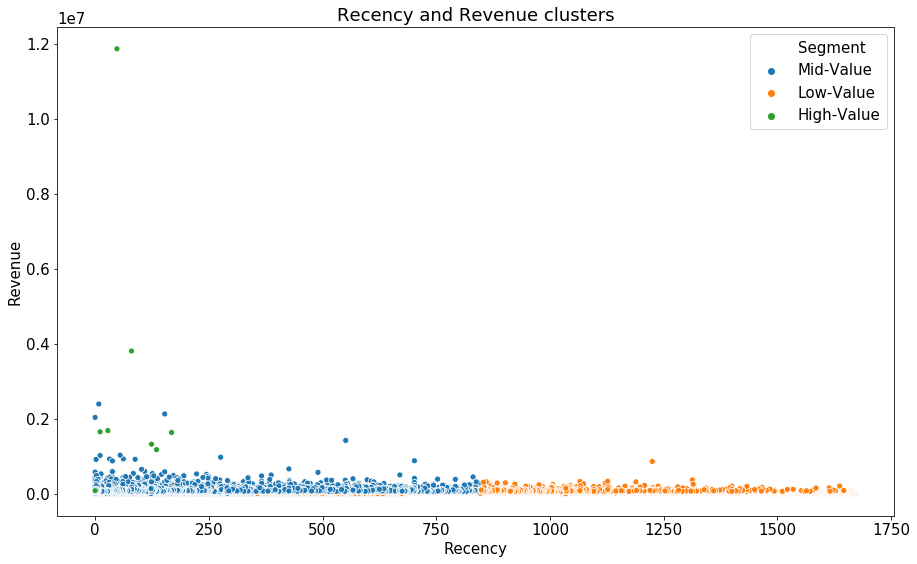

In [256]:
plt.figure(figsize=(15,9))
sns.scatterplot('Recency','Revenue',data=tx_user,hue='Segment')
plt.title('Recency and Revenue clusters')

Text(0.5, 1.0, 'Frequency and Revenue clusters')

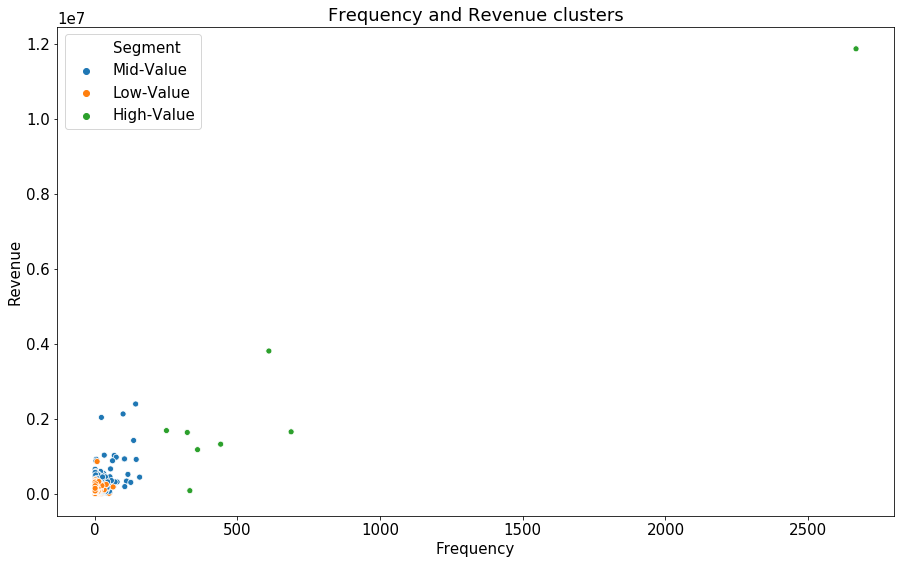

In [257]:
plt.figure(figsize=(15,9))
sns.scatterplot('Frequency','Revenue',data=tx_user,hue='Segment')
plt.title('Frequency and Revenue clusters')

In [2]:
tx_user = pd.read_csv('../data/customer_rfm.csv')
tx_user.head()

<IPython.core.display.Javascript object>

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,CS000018,186,2,1,0,49.75,0,2,Mid-Value
1,E10381,171,2,7,0,3891.28,0,2,Mid-Value
2,E10653,196,2,3,0,41121.73,0,2,Mid-Value
3,E1072,94,2,2,0,698.66,0,2,Mid-Value
4,E10864,107,2,1,0,2898.33,0,2,Mid-Value


In [6]:
tx_user['Segment'].value_counts()

Mid-Value     143658
Low-Value     109818
High-Value         8
Name: Segment, dtype: int64

In [10]:
segment_dic={
    'Low-Value': 0,
    'Mid-Value': 1,
    'High-Value': 2
}

In [11]:
tx_c = tx_user
tx_c.replace({'Segment': segment_dic}, inplace=True)
tx_c.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,CS000018,186,2,1,0,49.75,0,2,1
1,E10381,171,2,7,0,3891.28,0,2,1
2,E10653,196,2,3,0,41121.73,0,2,1
3,E1072,94,2,2,0,698.66,0,2,1
4,E10864,107,2,1,0,2898.33,0,2,1


In [15]:
plt.rcParams.update({'font.size': 15})

No handles with labels found to put in legend.


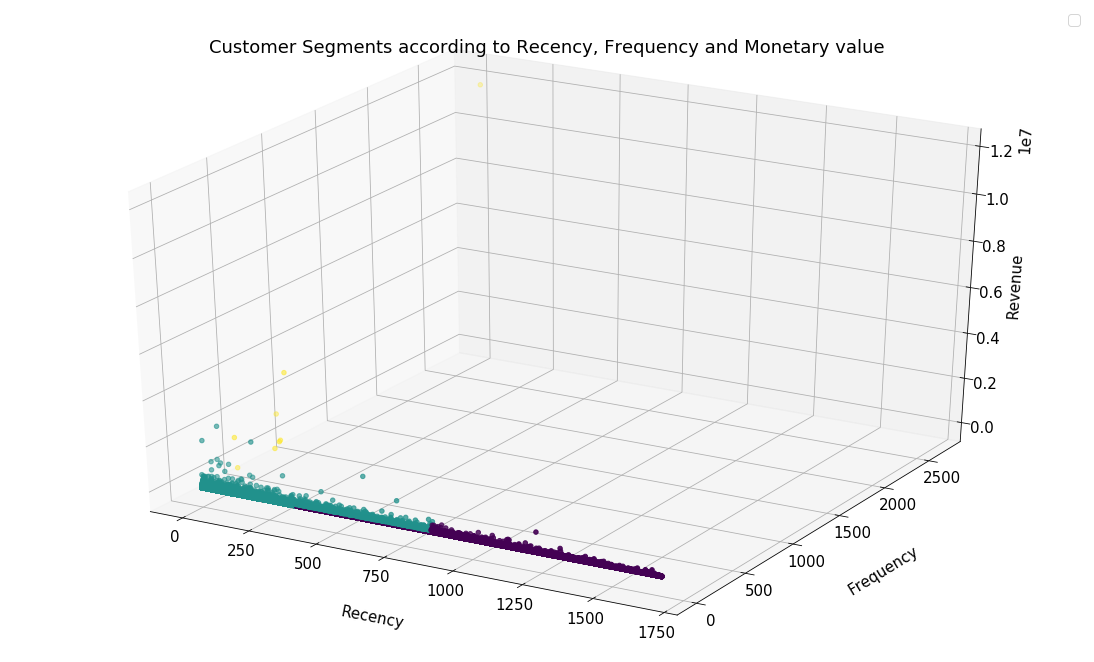

In [29]:
fig = plt.figure(figsize=(15,9))
ax = Axes3D(fig)
ax.scatter(tx_c['Recency'], tx_c['Frequency'],tx_c['Revenue'],c=tx_c['Segment'])
ax.legend()
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Revenue")
ax.dist = 10
ax.yaxis.labelpad=30
ax.xaxis.labelpad=30


plt.title('Customer Segments according to Recency, Frequency and Monetary value')
plt.show()

In [36]:
customer_invoice_right.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date,Cash /Cashless Type,...,Total Amt Wtd Tax.,Total Value,User ID,Invoice Day,Invoice Month,Invoice Year,Day of the week,Division Name,District,State
0,CS000018,CS000018,Unknown,NaN,Unknown,Unknown,Unknown,NaN,NaN,NaN,...,49.75,NaN,BC07SA2,28,4,2016,Thursday,Chengalpattu,kanchipuram,tamil nadu
1,E10007,E10007,Retail,Camp-Outdoor,Unknown,Unknown,Unknown,NaN,NaN,NaN,...,1083.77,1083.77,BC04FS1,4,7,2013,Thursday,Secunderabad,hyderabad,telangana
2,E10013,E10013,Retail,Camp-Outdoor,Unknown,Unknown,Unknown,NaN,NaN,NaN,...,1001.29,1001.29,BC04FS1,14,12,2013,Saturday,Hyderabad South East,hyderabad,telangana
3,E10013,E10013,Retail,Camp-Outdoor,Unknown,Unknown,Unknown,NaN,NaN,NaN,...,0.00,0.00,BC04FS1,14,12,2013,Saturday,Hyderabad South East,hyderabad,telangana
4,E10014,E10014,Retail,Camp-Outdoor,Mr.,Unknown,Unknown,NaN,NaN,NaN,...,785.21,785.21,BC05SA1,20,4,2013,Saturday,Secunderabad,hyderabad,telangana


In [37]:
customer_segment = customer_invoice_right.merge(tx_user, left_on='Customer No.', right_on='CustomerID')

In [42]:
customer_segment.columns

Index(['Business Partner', 'Customer No.', 'Partner Type', 'Data Origin',
       'Title', 'Marital Status', 'Occupation', 'Date of Birth', 'Death date',
       'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Expiry Date',
       'Gate Pass Date', 'Gate Pass Time', 'Insurance Company', 'Invoice Date',
       'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'ODN No.', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Policy no.', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Service Advisor Name', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'Invoice Day',
       'Invoice Month', 'Invoice Year', 'Day of the week', 'Division Name',
       'District', 'State', 'CustomerID', 'Recency', 'RecencyCluster',
       'Frequency', 'FrequencyCluster', 'Revenue', 'RevenueCluster',
       'OverallScore', 'Segment'],
      dtype=

In [58]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,CS000018,186,2,1,0,49.75,0,2,1
1,E10381,171,2,7,0,3891.28,0,2,1
2,E10653,196,2,3,0,41121.73,0,2,1
3,E1072,94,2,2,0,698.66,0,2,1
4,E10864,107,2,1,0,2898.33,0,2,1


In [69]:
low_level_customers = customer_segment[customer_segment['Segment'] == 0]
mid_level_customers = customer_segment[customer_segment['Segment'] == 1]
high_level_customers = customer_segment[customer_segment['Segment'] == 2]

In [79]:
low_level_customers.shape

(197429, 59)

In [80]:
mid_level_customers.shape

(289210, 59)

In [81]:
high_level_customers.shape

(5675, 59)

In [120]:
customer_segment.groupby(['Segment','Order Type'])['Invoice No'].count()

Segment  Order Type       
0        Accidental            18318
         Paid Service          54119
         Repeat Order           2126
         Running Repairs      108239
         SMC Redemption         8897
         SMC Value Package      5717
         Workshop Damage          13
1        Accidental            25262
         Mechanical            15077
         Paid Service          79297
         Repeat Order            915
         Running Repairs      157746
         SMC Redemption         6834
         SMC Value Package      4059
         WBW Order                17
         Workshop Damage           3
2        Accidental              579
         Mechanical               23
         Paid Service           1588
         Repeat Order              2
         Running Repairs        3470
         SMC Redemption            7
         SMC Value Package         5
         Workshop Damage           1
Name: Invoice No, dtype: int64

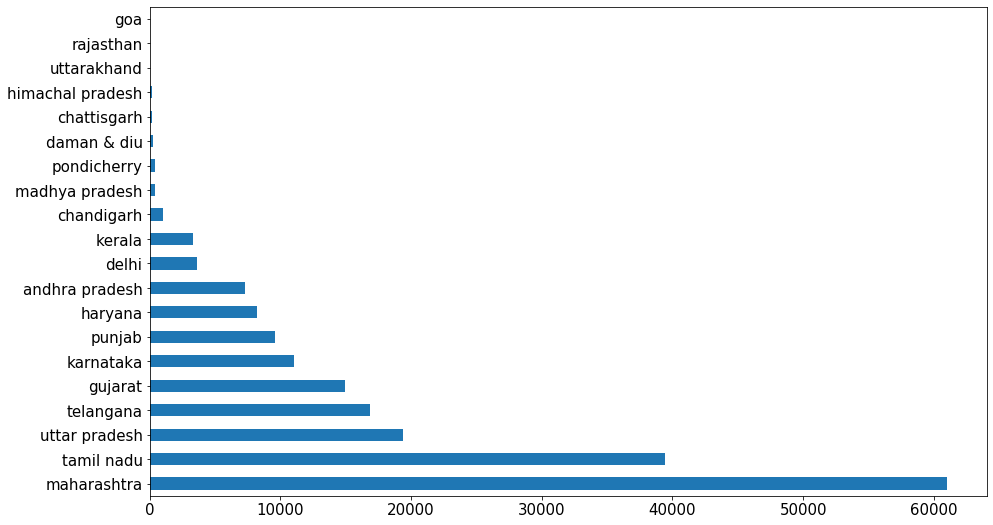

In [128]:
plt.figure(figsize=(15,9))
low_level_customers['State'].value_counts()[:20].plot(kind='barh')